***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 2</font>
***

# <font color=green>1 CONHECENDO OS DADOS</font>
***

## <font color=green>1.1 Dataset do projeto</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A **Pesquisa Nacional por Amostra de Domicílios - PNAD** investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a **Renda** era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a **Renda** era missing;
> 3. Foram considerados somente os registros das **Pessoas de Referência** de cada domicílio (responsável pelo domicílio).

### Importando pandas e lendo o dataset do projeto

https://pandas.pydata.org/

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/alura-cursos/Estatisticas-Python-frequencias-medidas/refs/heads/main/dados/dados_desafio.csv"
dados = pd.read_csv(url)

In [3]:
dados.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura
0,Rondônia,0,23,8,12,800,1.60
1,Rondônia,1,23,2,12,1150,1.74
2,Rondônia,1,35,8,15,880,1.76
3,Rondônia,0,46,2,6,3500,1.78
4,Rondônia,1,47,8,9,150,1.69


---
---

# <font color=green>2 DISTRIBUIÇÕES DE PROBABILIDADE</font>
***

## <font color=red>Problema</font>
***

Em um concurso para preencher uma vaga de cientista de dados temos um total de **10 questões** de múltipla escolha com **3 alternativas possíveis** em cada questão. **Cada questão tem o mesmo valor.** Suponha que um candidato resolva se aventurar sem ter estudado absolutamente nada. Ele resolve fazer a prova de olhos vendados e chutar todas as resposta. Assumindo que a prova **vale 10 pontos e a nota de corte seja 5**, obtenha a probabilidade deste candidato **acertar 5 questões** e também a probabilidade deste candidato **passar para a próxima etapa do processo seletivo**.

## <font color=green>2.1 Distribuição Binomial</font>
***

Um evento **binomial** é caracterizado pela possibilidade de ocorrência de apenas duas categorias. Estas categorias somadas representam todo o espaço amostral, sendo também mutuamente excludentes, ou seja, a ocorrência de uma implica na não ocorrência da outra.

Em análises estatísticas o uso mais comum da distribuição binomial é na solução de problemas que envolvem situações de **sucesso** e **fracasso**.

# $$P(k)=\binom{n}{k} p^k q^{n-k}$$

Onde:

$p$ = probabilidade de sucesso

$q = (1 - p)$ = probabilidade de fracasso

$n$ = número de eventos estudados

$k$ = número de eventos desejados que tenham sucesso

### Experimento Binomial

1. Realização de $n$ ensaios idênticos.

2. Os ensaios são independentes.

3. Somente dois resultados são possíveis, exemplo: Verdadeiro ou falso; Cara ou coroa; Sucesso ou fracasso.

4. A probabilidade de sucesso é representada por $p$ e a de fracasso por $1-p=q$. Estas probabilidades não se modificam de ensaio para ensaio.

### Média da distribuição binomial

O valor esperado ou a média da distribuição binomial é igual ao número de experimentos realizados multiplicado pela chance de ocorrência do evento.

# $$\mu = n \times p$$

### Desvio padrão da distribuição binomial

O desvio padrão é o produto entre o número de experimentos, a probabilidade de sucesso e a probabilidade de fracasso.

# $$\sigma = \sqrt{n \times p \times q}$$

### Importando bibliotecas
https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.comb.html

In [4]:
from scipy.special import comb



In [5]:
#fatorial

def fat(n):
    if(n == 0):
        return 1
    else:
        return n * fat(n-1)
    
fat(5)

120

In [6]:
def recursive_sum(n):
    if (n < 1):
        return 0
    else: 
        return  n + recursive_sum(n -1)
     
    
recursive_sum(5)

15

In [7]:
def fat_recursivo(n):
    #5!= 5 * 4 * 3 * 2 * 1
    i = n
    while i > 1:
        n *= (i-1)
        i -= 1

    return n
fat_recursivo(5)

120

### Combinações

Número de combinações de $n$ objetos, tomados $k$ a cada vez, é:

# $$C_{k}^{n} = \binom{n}{k} = \frac{n!}{k!(n - k)!}$$

Onde

## $$n! = n\times(n-1)\times(n-2)\times...\times(2)\times(1)$$
## $$k! = k\times(k-1)\times(k-2)\times...\times(2)\times(1)$$

Por definição

## $$0! = 1$$

## <font color='blue'>Exemplo: Mega Sena</font>

Em um volante de loteria da Mega Sena temos um total de **60 números** para escolher onde a aposta mínima é de **seis números**. Você que é curiosa(o) resolve calcular a probabilidade de se acertar na Mega Sena com apenas **um jogo**. Para isso precisamos saber quantas **combinações de seis números podem ser formadas com os 60 números disponíveis**.

### $$C_{6}^{60} = \binom{60}{6} = \frac{60!}{6!(60 - 6)!}$$

In [8]:
combinacoes = comb(60, 6)
combinacoes 
print(f'Com 60 números são possíveis {combinacoes:,.2f} combinações.')

Com 60 números são possíveis 50,063,860.00 combinações.


In [9]:
# A probabilidade de acerto se da da divisão de 1 pela quantidade de combinações possíveis.
probabilidade = 1 / combinacoes
print(f'A chance de acerto de 6 números em {combinacoes:,.2f} combinações possíveis é de: {probabilidade:.15f}%')

A chance de acerto de 6 números em 50,063,860.00 combinações possíveis é de: 0.000000019974489%


In [10]:
comb_exercicio = comb(25, 20)
probabilidade = 1 / comb_exercicio
f'{probabilidade:.15f}'

'0.000018821757952'

In [11]:
comb_exercicio

np.float64(53130.0)

## <font color='blue'>Exemplo: Concurso para cientista de dados</font>

Em um concurso para preencher uma vaga de cientista de dados temos um total de **10 questões** de múltipla escolha com **3 alternativas possíveis** em cada questão. **Cada questão tem o mesmo valor.** Suponha que um candidato resolva se aventurar sem ter estudado absolutamente nada. Ele resolve fazer a prova de olhos vendados e chutar todas as resposta. Assumindo que a prova **vale 10 pontos e a nota de corte seja 5**, obtenha a probabilidade deste candidato **acertar 5 questões** e também a probabilidade deste candidato **passar para a próxima etapa do processo seletivo**.

### Qual o número de ensaios ($n$)?

In [12]:
n = 10
n

10

### Os ensaios são independentes?

Sim. A opção escolhida em uma questão não influencia em nada a opção escolhida em outra questão.

### Somente dois resultados são possíveis em cada ensaio?

Sim. O candidato tem duas possibilidades, ACERTA ou ERRAR uma questão. 

### Qual a probabilidade de sucesso ($p$)?

In [13]:
num_alternativas_questao = 3
p = 1 / num_alternativas_questao
p #probabilidade de sucesso

0.3333333333333333

### Qual a probabilidade de fracasso ($q$)?

In [14]:
q = 1 - p
q #probabilidade de fracasso

0.6666666666666667

### Qual o total de eventos que se deseja obter sucesso ($k$)?

In [15]:
k = 5
k

5

### Solução 1

In [16]:
# Solução manual aplicando a formula no python.
prob = (comb(n, k) * (p ** k) * (q ** (n - k)))
print(f'A probabilidade de acerto de 5 perguntas é de: {prob:.8f}%')

A probabilidade de acerto de 5 perguntas é de: 0.13656455%


### Importando bibliotecas
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

In [17]:
# Solução utilizando a função binom do scipy.stats
from scipy.stats import binom

prob2 = binom.pmf(k, n, p) * 100
print(f'A probabilidade de acerto de 5 perguntas é de: {prob2:.2f}%')

A probabilidade de acerto de 5 perguntas é de: 13.66%


### Solução 2

### Obter a probabilidade do candidato passar

### $$P(acertar \geq 5) = P(5) + P(6) + P(7) + P(8) + P(9) + P10)$$

In [18]:
# É a soma das propabilidades de aprovação.
soma = 0
for i in range(k, n + 1):
    soma += binom.pmf(i, n, p)
soma *= 100
print(f'A probabilidade de passar: {soma:.2f}%')

A probabilidade de passar: 21.31%


In [19]:

print(f'A probabilidade de passar: {binom.pmf([x for x in range(k, n+1)], n, p).sum():.8f}%')

A probabilidade de passar: 0.21312808%


In [20]:
#Usando binom.cdf
# Se a quantidade minima é 5 para passar, então a soma da probabilidade de k = [5,6,7,8,9,10] retorna a probabilidade total de ser aprovado. O binom.cdf calcula a distribuição cumulativa. Usando apenas o binom.cdf com k=4, obtemos o resultado culmulativo de probabilidade de acertar até 4 questões, ou seja, ele calcula a probabilidade de sucesso cumulativo de [0,1,2,3,4]. Como nosso objetico é acertar 5 ou mais questões, utilizamos o (1-) antes do binom.cdf para obter o resultado que queremos.
1 - binom.cdf(4, n, p) 

np.float64(0.21312808006909523)

In [21]:
# O binom.sf é a forma abrevidada do binom.cdf
binom.sf(4, n, p) * 100

np.float64(21.312808006909524)

Uma moeda, perfeitamente equilibrada, é lançada para o alto quatro vezes. Utilizando a distribuição binomial, obtenha a probabilidade de a moeda cair com a face coroa voltada para cima duas vezes.

In [22]:

n_moeda = 4 #num lancamentos
p_moeda = 1 / 2 #probabilidade
k_moeda = 2 #  quantidade coroa desejada


In [23]:
result = binom.pmf(k_moeda, n_moeda, p_moeda) * 100
print(f'Nos  lançamenos, a probabilidade é o resultado ser coroa é de {result}%')

Nos  lançamenos, a probabilidade é o resultado ser coroa é de 37.5%


In [24]:
prob_moeda =binom.sf(2, n_moeda, p_moeda) 
print(f'{prob_moeda}')

0.3125


Um dado, perfeitamente equilibrado, é lançado para o alto dez vezes. Utilizando a distribuição binomial, obtenha a probabilidade de o dado cair com o número cinco voltado para cima pelo menos três vezes.

In [25]:
n_dado = 10 #num lancamentos
p_dado = 1 / 6 #probabilidade
k_dado = 3 #  quantidade coroa desejada

1-binom.cdf(k_dado -1 , n_dado, p_dado)

np.float64(0.22477320212874052)

In [26]:
result = binom.sf(2, n_dado, p_dado) * 100
print(f'A probabilidade do dado cair com o número 5 voltado para cima nos 10 lançamentos é de: {result:.2f} %')

A probabilidade do dado cair com o número 5 voltado para cima nos 10 lançamentos é de: 22.48 %


## <font color='blue'>Exemplo: Gincana</font>

Uma cidade do interior realiza todos os anos uma gincana para arrecadar fundos para o hospital da cidade. Na última gincana se sabe que a **proporção de participantes do sexo feminino foi de 60%**. **O total de equipes, com 12 integrantes, inscritas na gincana deste ano é de 30**. Com as informações acima responda: Quantas equipes deverão ser formadas por **8 mulheres**?

### Solução

In [27]:
p = .6
n = 12
k = 8

probability = binom.pmf(k, n, p)
print(f'A probabilidade de: {probability:.8f}')

A probabilidade de: 0.21284094


In [28]:
equipes = 30 * probability
equipes

np.float64(6.3852281856)

---
---

## <font color=red>Problema</font>
***

Um restaurante recebe em média **20 pedidos por hora**. Qual a chance de que, em determinada hora escolhida ao acaso, o restaurante receba **15 pedidos**?

In [29]:
from scipy.stats import poisson


media = 20
k = 15
poisson.pmf(k, media)

np.float64(0.05164885353175814)

Suponha que a probabilidade de um casal ter filhos com olhos azuis seja de 22%. Em 50 famílias, com 3 crianças cada uma, quantas podemos esperar que tenham dois filhos com olhos azuis?

In [30]:
p = .22
n = 3
k = 2

result = binom.pmf(k, n, p) 

media = result * 50
media
print(f"A probabilidade é uma média de {media:.2f} familias terem olhos 2 filhos de olhos azuis")

A probabilidade é uma média de 5.66 familias terem olhos 2 filhos de olhos azuis


## <font color=green>2.2 Distribuição Poisson</font>
***

É empregada para descrever o número de ocorrências em um intervalo de tempo ou espaço específico. Os eventos são caracterizados pela possibilidade de contagem dos sucessos, mas a não possibilidade de contagem dos fracassos.

Como exemplos de processos onde podemos aplicar a distribuição de Poisson temos a determinação do número de clientes que entram em uma loja em determinada hora, o número de carros que chegam em um drive-thru de uma lanchonete na hora do almoço, a determinação do número de acidentes registrados em um trecho de estrada etc.

# $$P(k) = \frac{e^{-\mu}(\mu)^k}{k!}$$

Onde:

$e$ = constante cujo valor aproximado é 2,718281828459045

$\mu$ = representa o número médio de ocorrências em um determinado intervalo de tempo ou espaço

$k$ = número de sucessos no intervalo desejado

### Experimento Poisson

1. A probabilidade de uma ocorrência é a mesma em todo o intervalo observado.

2. O número de ocorrências em determinado intervalo é independente do número de ocorrências em outros intervalos.

3. A probabilidade de uma ocorrência é a mesma em intervalos de igual comprimento.

### Média da distribuição Poisson

# $$\mu$$

### Desvio padrão da distribuição Poisson

# $$\sigma = \sqrt{\mu}$$

### Importando bibliotecas

http://www.numpy.org/

## <font color='blue'>Exemplo: Delivery</font>

Um restaurante recebe em média **20 pedidos por hora**. Qual a chance de que, em determinada hora escolhida ao acaso, o restaurante receba **15 pedidos**?

### Qual o número médio de ocorrências por hora ($\mu$)?

In [31]:
ocorrencias_hora = 20

### Qual o número de ocorrências que queremos obter no período ($k$)?

In [32]:
k = 15

### Solução 1

### Importando bibliotecas

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html

### Solução 2

In [33]:
poisson.pmf(k, ocorrencias_hora)

np.float64(0.05164885353175814)

---
---

## <font color=red>Problema</font>
***

Em um estudo sobre as alturas dos moradores de uma cidade verificou-se que o conjunto de dados segue uma **distribuição aproximadamente normal**, com **média 1,70** e **desvio padrão de 0,1**. Com estas informações obtenha o seguinte conjunto de probabilidades:

> **A.** probabilidade de uma pessoa, selecionada ao acaso, ter menos de 1,80 metros.

> **B.** probabilidade de uma pessoa, selecionada ao acaso, ter entre 1,60 metros e 1,80 metros.    

> **C.** probabilidade de uma pessoa, selecionada ao acaso, ter mais de 1,90 metros.

## <font color=green>2.3 Distribuição Normal</font>
***

A distribuição normal é uma das mais utilizadas em estatística. É uma distribuição contínua, onde a distribuição de frequências de uma variável quantitativa apresenta a forma de sino e é simétrica em relação a sua média.

![Normal](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img001.png)

### Características importantes

1. É simétrica em torno da média;

2. A área sob a curva corresponde à proporção 1 ou 100%;

3. As medidas de tendência central (média, mediana e moda) apresentam o mesmo valor;

4. Os extremos da curva tendem ao infinito em ambas as direções e, teoricamente, jamais tocam o eixo $x$;

5. O desvio padrão define o achatamento e largura da distribuição. Curvas mais largas e mais achatadas apresentam valores maiores de desvio padrão;

6. A distribuição é definida por sua média e desvio padrão;

7. A probabilidade sempre será igual à área sob a curva, delimitada pelos limites inferior e superior.

# $$f(x) = \frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Onde:

$x$ = variável normal

$\sigma$ = desvio padrão

$\mu$ = média

A probabilidade é obtida a partir da área sob a curva, delimitada pelos limites inferior e superior especificados. Um exemplo pode ser visto na figura abaixo.

![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img002.png)


Para obter a área acima basta calcular a integral da função para os intervalos determinados. Conforme equação abaixo:

# $$P(L_i<x<L_s) = \int_{L_i}^{L_s}\frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Onde:

$x$ = variável normal

$\sigma$ = desvio padrão

$\mu$ = média

$L_i$ = limite inferior

$L_s$ = limite superior

### Tabelas padronizadas

As tabelas padronizadas foram criadas para facilitar a obtenção dos valores das áreas sob a curva normal e eliminar a necessidade de solucionar integrais definidas.

Para consultarmos os valores em uma tabela padronizada basta transformarmos nossa variável em uma variável padronizada $Z$.

Esta variável $Z$ representa o afastamento em desvios padrões de um valor da variável original em relação à média.

# $$Z = \frac{x-\mu}{\sigma}$$

Onde:

$x$ = variável normal com média $\mu$ e desvio padrão $\sigma$

$\sigma$ = desvio padrão

$\mu$ = média

### Construindo tabela normal padronizada
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [34]:
import pandas as pd
import numpy as np
from scipy.stats import norm

tabela_normal_padronizada = pd.DataFrame(
    [], 
    index=["{0:0.2f}".format(i / 100) for i in range(0, 400, 10)],
    columns = ["{0:0.2f}".format(i / 100) for i in range(0, 10)])

for index in tabela_normal_padronizada.index:
    for column in tabela_normal_padronizada.columns:
        Z = np.round(float(index) + float(column), 2)
        tabela_normal_padronizada.loc[index, column] = "{0:0.4f}".format(norm.cdf(Z))

tabela_normal_padronizada.rename_axis('Z', axis = 'columns', inplace = True)

tabela_normal_padronizada

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.00,0.5000,0.5040,0.5080,0.5120,0.5160,0.5199,0.5239,0.5279,0.5319,0.5359
0.10,0.5398,0.5438,0.5478,0.5517,0.5557,0.5596,0.5636,0.5675,0.5714,0.5753
0.20,0.5793,0.5832,0.5871,0.5910,0.5948,0.5987,0.6026,0.6064,0.6103,0.6141
0.30,0.6179,0.6217,0.6255,0.6293,0.6331,0.6368,0.6406,0.6443,0.6480,0.6517
0.40,0.6554,0.6591,0.6628,0.6664,0.6700,0.6736,0.6772,0.6808,0.6844,0.6879
0.50,0.6915,0.6950,0.6985,0.7019,0.7054,0.7088,0.7123,0.7157,0.7190,0.7224
0.60,0.7257,0.7291,0.7324,0.7357,0.7389,0.7422,0.7454,0.7486,0.7517,0.7549
0.70,0.7580,0.7611,0.7642,0.7673,0.7704,0.7734,0.7764,0.7794,0.7823,0.7852
0.80,0.7881,0.7910,0.7939,0.7967,0.7995,0.8023,0.8051,0.8078,0.8106,0.8133
0.90,0.8159,0.8186,0.8212,0.8238,0.8264,0.8289,0.8315,0.8340,0.8365,0.8389


<img src='https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img003.png' width='450px'>

A tabela acima fornece a área sob a curva entre $-\infty$ e $Z$ desvios padrão acima da média. Lembrando que por se tratar de valores padronizados temos $\mu = 0$.

## <font color='blue'>Exemplo: Qual sua altura?</font>

Em um estudo sobre as alturas dos moradores de uma cidade verificou-se que o conjunto de dados segue uma **distribuição aproximadamente normal**, com **média 1,70** e **desvio padrão de 0,1**. Com estas informações obtenha o seguinte conjunto de probabilidades:

> **A.** probabilidade de uma pessoa, selecionada ao acaso, ter menos de 1,80 metros.

> **B.** probabilidade de uma pessoa, selecionada ao acaso, ter entre 1,60 metros e 1,80 metros.    

> **C.** probabilidade de uma pessoa, selecionada ao acaso, ter mais de 1,90 metros.

### Problema A - Identificação da área sob a curva

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img004.png' width='550px'>

### Obter a variável padronizada $Z$

In [35]:
media = 1.7
media 

1.7

In [36]:
desvio_padrao = 0.1
desvio_padrao 

0.1

In [37]:
z = (1.8 - media) / desvio_padrao
z

1.0000000000000009

### Solução 1 - Utilizando tabela

In [38]:
probabilidade = float(tabela_normal_padronizada.loc['1.00'].iloc[0])
probabilidade
print(f'probabilidade de uma pessoa, selecionada ao acaso, ter menos de 1,80 metros é de: {probabilidade} %')

probabilidade de uma pessoa, selecionada ao acaso, ter menos de 1,80 metros é de: 0.8413 %


### Solução 2 - Utilizando Scipy

In [39]:
from scipy.stats import norm

probabilidade_scipy = norm.cdf(z)
print(f'probabilidade de uma pessoa, selecionada ao acaso, ter menos de 1,80 metros é de: {probabilidade_scipy:.4f} %')

probabilidade de uma pessoa, selecionada ao acaso, ter menos de 1,80 metros é de: 0.8413 %



### Prova estátistica - Desafio proposto pela Luri, a IA da Alura

A aplicação de uma prova de estatística em um concurso apresentou um conjunto de notas normalmente distribuídas. Verificou-se que o conjunto de notas tinha média 70 e desvio padrão de 5 pontos.

Qual a probabilidade de um aluno, selecionado ao acaso, ter nota menor que 85?

In [40]:
#z = (1.8 - media) / desvio_padrao
media = 70
desvio_padrao = 5
z =(85 - media) / desvio_padrao
norm.cdf(z) #norm.cdf(85, loc=70, scale=5) => 0.9986501019683699

np.float64(0.9986501019683699)

In [41]:
z

3.0

### Problema B - Identificação da área sob a curva

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img005.png' width='550px'>

### Obter a variável padronizada $Z$

In [42]:
media = 1.7
desvio_padrao = .1
Z_inferior = (1.6 - media) / desvio_padrao
round(Z_inferior,2)

-1.0

In [43]:

Z_superior = (1.8 - media) / desvio_padrao
round(Z_superior, 2)

1.0

### Solução 1 - Utilizando tabela

In [44]:
probabilidade = (.8413 - .5) * 2
probabilidade

0.6826000000000001

### Solução 2 - Utilizando Scipy

In [45]:
probabilidade = norm.cdf(Z_superior) - (1 - norm.cdf(Z_superior))
probabilidade

np.float64(0.6826894921370863)

#### Desafio - Faturamento diário

O faturamento diário de um motorista de aplicativo segue uma distribuição aproximadamente normal, com média R$ 300,00 e desvio padrão igual a R$ 50,00. Obtenha as probabilidades de que, em um dia aleatório, o motorista ganhe:

1) Entre R$ 250,00 e R$ 350,00

2) Entre R$ 400,00 e R$ 500,00

In [46]:
from scipy.stats import norm

media = 300
desvio_padrao = 50
Z_inferior = (250 - media) / desvio_padrao
Z_superior = (350 - media) / desvio_padrao

probabilidade = norm.cdf(Z_superior) - norm.cdf(Z_inferior)
print("{0:.2%}".format(probabilidade))

68.27%


In [47]:
from scipy.stats import norm

media = 300
desvio_padrao = 50
Z_inferior = (400 - media) / desvio_padrao
Z_superior = (500 - media) / desvio_padrao

probabilidade = norm.cdf(Z_superior) - norm.cdf(Z_inferior)
print("{0:.2%}".format(probabilidade))

2.27%


### Problema C - Identificação da área sob a curva

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img006.png' width='350px'>

### Obter a variável padronizada $Z$

In [48]:
Z = (1.9 - media) / desvio_padrao
Z

-5.962000000000001

### Solução 1 - Utilizando tabela

In [49]:
probabilidade = 1 - float(tabela_normal_padronizada.loc['1.90'].iloc[-1] )
probabilidade

0.023299999999999987

### Solução 2 - Utilizando Scipy

In [50]:
probabilidade = 1 - norm.cdf(Z)
probabilidade

np.float64(0.9999999987541542)

### Desafio - Vida útil

O Inmetro verificou que as lâmpadas incandescentes da fabricante XPTO apresentam uma vida útil normalmente distribuída, com média igual a 720 dias e desvio padrão igual a 30 dias. Calcule a probabilidade de uma lâmpada, escolhida ao acaso, durar:

1) Entre 650 e 750 dias

2) Mais que 800 dias

3) Menos que 700 dias

In [51]:
from scipy.stats import norm

# Dados da vida útil das lâmpadas
media = 720
desvio_padrao = 30

# 1) Probabilidade entre 650 e 750 dias
p_650_750 = (norm.cdf(750, media, desvio_padrao) - norm.cdf(650, media, desvio_padrao)) * 100

# 2) Probabilidade de durar mais que 800 dias
p_maior_800 = (1 - norm.cdf(800, media, desvio_padrao)) * 100

# 3) Probabilidade de durar menos que 700 dias
p_menor_700 = (norm.cdf(700, media, desvio_padrao)) * 100

# Exibir os resultados
print(f"Probabilidade entre 650 e 750 dias: {p_650_750:.2f}%")
print(f"Probabilidade de durar mais que 800 dias: {p_maior_800:.2f}%")
print(f"Probabilidade de durar menos que 700 dias: {p_menor_700:.2f}%")

Probabilidade entre 650 e 750 dias: 83.15%
Probabilidade de durar mais que 800 dias: 0.38%
Probabilidade de durar menos que 700 dias: 25.25%


### Obtendo a probabilidade

Utilizando a tabela padronizada, ou o ferramental disponibilizado pelo Python, encontre a área sob a curva normal para os valores de Z abaixo:

1) Z < 1,96

2) Z > 2,15

3) Z < -0,78

4) Z > 0,59

In [52]:
from scipy.stats import norm

# 1) P(Z < 1.96)
area_1 = norm.cdf(1.96)

# 2) P(Z > 2.15)
area_2 = 1 - norm.cdf(2.15)

# 3) P(Z < -0.78)
area_3 = norm.cdf(-0.78)

# 4) P(Z > 0.59)
area_4 = 1 - norm.cdf(0.59)

# Exibir resultados
print(f"Z < 1.96: {area_1:.4f}")
print(f"Z > 2.15: {area_2:.4f}")
print(f"Z < -0.78: {area_3:.4f}")
print(f"Z > 0.59: {area_4:.4f}")


Z < 1.96: 0.9750
Z > 2.15: 0.0158
Z < -0.78: 0.2177
Z > 0.59: 0.2776


# <font color=green>3 AMOSTRAGEM</font>
***

## <font color=green>3.1 População e Amostra</font>
***

### População
Conjunto de todos os elementos de interesse em um estudo. Diversos elementos podem compor uma população, por exemplo: pessoas, idades, alturas, carros etc.

Com relação ao tamanho, as populações podem ser limitadas (populações finitas) ou ilimitadas (populações infinitas).

### Populações finitas

Permitem a contagem de seus elementos. Como exemplos temos o número de funcionário de uma empresa, a quantidade de alunos em uma escola etc.

### Populações infinitas

Não é possível contar seus elementos. Como exemplos temos a quantidade de porções que se pode extrair da água do mar para uma análise, temperatura medida em cada ponto de um território etc.

<font color=red>Quando os elementos de uma população puderem ser contados, porém apresentando uma quantidade muito grande, assume-se a população como infinita.</font>.

### Amostra
Subconjunto representativo da população.

Os atributos numéricos de uma população como sua média, variância e desvio padrão, são conhecidos como **parâmetros**. O principal foco da inferência estatística é justamente gerar estimativas e testar hipóteses sobre os parâmetros populacionais utilizando as informações de amostras.

## <font color=green>3.2 Quando utilizar uma amostra?</font>
***

### Populações infinitas

O estudo não chegaria nunca ao fim. Não é possível investigar todos os elementos da população.

### Testes destrutivos

Estudos onde os elementos avaliados são totalmente consumidos ou destruídos. Exemplo: testes de vida útil, testes de segurança contra colisões em automóveis.

### Resultados rápidos

Pesquisas que precisam de mais agilidade na divulgação. Exemplo: pesquisas de opinião, pesquisas que envolvam problemas de saúde pública.

### Custos elevados

Quando a população é finita mas muito numerosa, o custo de um censo pode tornar o processo inviável.

## <font color=green>3.3 Amostragem Aleatória Simples</font>
***

É uma das principais maneiras de se extrair uma amostra de uma população. A exigência fundamental deste tipo de abordagem é que cada elemeto da população tenha as mesmas chances de ser selecionado para fazer parte da amostra.

In [53]:
# Obtndo uma amosta
dados.Renda.mean()

np.float64(2000.3831988547631)

In [54]:
# Criando uma amostra de 100 individuos e uma seed
amostra = dados.sample(n=100, random_state=101)
amostra.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 29042 to 34891
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              100 non-null    object 
 1   Sexo            100 non-null    int64  
 2   Idade           100 non-null    int64  
 3   Cor             100 non-null    int64  
 4   Anos.de.Estudo  100 non-null    int64  
 5   Renda           100 non-null    int64  
 6   Altura          100 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 6.2+ KB


In [55]:
# Renda media da amostra de 100 individuos
amostra.Renda.mean()

np.float64(2150.85)

In [56]:
dados.Sexo.value_counts(normalize=True)

Sexo
0    0.692998
1    0.307002
Name: proportion, dtype: float64

In [57]:
amostra.Sexo.value_counts(normalize=True)

Sexo
0    0.69
1    0.31
Name: proportion, dtype: float64

## <font color=green>3.4 Amostragem Estratificada</font>
***

É uma melhoria do processo de amostragem aleatória simples. Neste método é proposta a divisão da população em subgrupos de elementos com características similares, ou seja, grupos mais homogêneos. Com estes subgrupos separados, aplica-se a técnica de amostragem aleatória simples dentro de cada subgrupo individualmente.

## <font color=green>3.5 Amostragem por Conglomerados</font>
***

Também visa melhorar o critério de amostragem aleatória simples. Na amostragem por conglomerados são também criados subgrupos, porém não serão homogêneas como na amostragem estratificada. Na amostragem por conglomerados os subgrupos serão heterogêneos, onde, em seguida, serão aplicadas a amostragem aleatória simples ou estratificada.

Um exemplo bastante comum de aplicação deste tipo de técnica é na divisão da população em grupos territoriais, onde os elementos investigados terão características bastante variadas.

# <font color=green>4 ESTIMAÇÃO</font>
***

## <font color='red'>Problema </font>

Suponha que os pesos dos sacos de arroz de uma indústria alimentícia se distribuem aproximadamente como uma normal de **desvio padrão populacional igual a 150 g**. Selecionada uma **amostra aleatório de 20 sacos** de um lote específico, obteve-se um **peso médio de 5.050 g**. Construa um **intervalo de confiança para a média populacional** assumindo um **nível de significância de 5%**.

---

É a forma de se fazer suposições generalizadas sobre os parâmetros de uma população tendo como base as informações de uma amostra.

- **Parâmetros** são os atributos numéricos de uma população, tal como a média, desvio padrão etc.

- **Estimativa** é o valor obtido para determinado parâmetro a partir dos dados de uma amostra da população.

## <font color=green>4.1 Teorema do limite central</font>
***

> O **Teorema do Limite Central** afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal com média igual à média da população e desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para $n$ maior ou igual a 30.

# $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

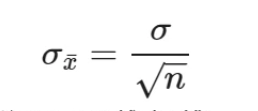

O desvio padrão das médias amostrais é conhecido como **erro padrão da média**

### Entendendo o Teorema do Limite Central

In [58]:
n = 2000
total_amostras = 1500

In [59]:
amostras = pd.DataFrame()
amostras

""


In [60]:
for i in range(total_amostras):
    _ = dados.Idade.sample(n)
    _.index = range(0, len(_))
    amostras['amostra_' + str(i)] = _

/tmp/ipykernel_10666/2007661016.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['amostra_' + str(i)] = _
/tmp/ipykernel_10666/2007661016.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amostras['amostra_' + str(i)] = _
/tmp/ipykernel_10666/2007661016.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe

In [61]:
amostras

,amostra_0,amostra_1,amostra_2,amostra_3,amostra_4,amostra_5,amostra_6,amostra_7,amostra_8,amostra_9,...,amostra_1490,amostra_1491,amostra_1492,amostra_1493,amostra_1494,amostra_1495,amostra_1496,amostra_1497,amostra_1498,amostra_1499
0,20,46,32,48,42,62,55,23,47,54,...,24,38,33,47,19,47,23,45,53,39
1,57,51,34,32,58,46,37,31,68,61,...,36,47,46,33,53,47,45,58,23,50
2,37,24,35,24,42,56,40,58,35,27,...,38,40,42,62,55,73,65,46,47,36
3,34,37,57,64,23,60,45,33,52,40,...,35,36,45,54,39,22,30,77,42,41
4,31,45,41,50,56,53,43,75,48,38,...,47,62,47,40,58,21,27,56,58,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,38,50,56,30,34,49,38,66,50,48,...,60,67,32,42,42,51,43,47,57,48
1996,48,34,55,23,36,26,46,48,31,40,...,36,61,23,47,62,53,57,48,59,46
1997,41,39,32,21,45,59,54,51,42,30,...,44,56,54,33,27,30,33,60,38,38
1998,44,33,46,36,53,43,50,45,37,69,...,23,26,25,35,32,35,45,35,50,58


> O Teorema do Limite Central afirma que, **com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal** com média igual à média da população e desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para n maior ou igual a 30.

<Axes: >

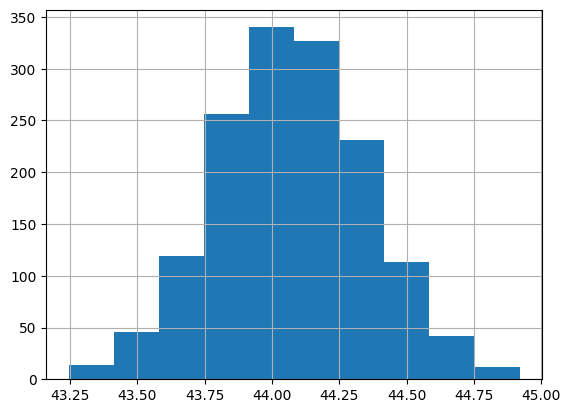

In [62]:
amostras.mean().hist()

> O Teorema do Limite Central afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal **com média igual à média da população** e desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para n maior ou igual a 30.

In [63]:
dados.Idade.mean()

np.float64(44.07142113482561)

In [64]:
amostras.mean().mean()

np.float64(44.072825)

> O Teorema do Limite Central afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal com média igual à média da população e **desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra**. Este fato é assegurado para n maior ou igual a 30.

# $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

In [65]:
amostras.mean().std()

np.float64(0.28000509121991457)

In [66]:
dados.Idade.std() / np.sqrt(n)

np.float64(0.27907433027404266)

## <font color=green>4.2 Níveis de confiança e significância</font>
***

O **nível de confiança** ($1 - \alpha$) representa a probabilidade de acerto da estimativa. De forma complementar o **nível de significância** ($\alpha$) expressa a probabilidade de erro da estimativa.

O **nível de confiança** representa o grau de confiabilidade do resultado da estimativa estar dentro de determinado intervalo. Quando fixamos em uma pesquisa um **nível de confiança** de 95%, por exemplo, estamos assumindo que existe uma probabilidade de 95% dos resultados da pesquisa representarem bem a realidade, ou seja, estarem corretos.

O **nível de confiança** de uma estimativa pode ser obtido a partir da área sob a curva normal como ilustrado na figura abaixo.

![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img007.png)

## <font color=green>4.3 Erro inferencial</font>
***

O **erro inferencial** é definido pelo **desvio padrão das médias amostrais** $\sigma_\bar{x}$ e pelo **nível de confiança** determinado para o processo.

# $$e = z \frac{\sigma}{\sqrt{n}}$$

## <font color=green>4.4 Intervalos de confiança</font>
***

### Intevalo de confiança para a média da população

#### Com desvio padrão populacional conhecido

## $$\mu = \bar{x} \pm z\frac{\sigma}{\sqrt{n}}$$

#### Com desvio padrão populacional desconhecido

## $$\mu = \bar{x} \pm z\frac{s}{\sqrt{n}}$$

## <font color='blue'>Exemplo: </font>

Suponha que os pesos dos sacos de arroz de uma indústria alimentícia se distribuem aproximadamente como uma normal de **desvio padrão populacional igual a 150 g**. Selecionada uma **amostra aleatório de 20 sacos** de um lote específico, obteve-se um **peso médio de 5.050 g**. Construa um intervalo de confiança para a **média populacional** assumindo um **nível de significância de 5%**.

### Média amostral

### Nível de significância ($\alpha$)

### Nível de confiança ($1 - \alpha$)

### Obtendo $z$

### Obtendo $z$

![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img008.png)

### Valores de $z$ para os níveis de confiança mais utilizados

|Nível de<br>confiança|Valor da área sob<br>a curva normal| $z$ |
|:----------------:|:---------------------------------:|:---:|
|90%               |0,95                               |1,645|
|95%               |0,975                              |1,96 |
|99%               |0,995                              |2,575|

### Obtendo $\sigma_\bar{x}$

### Obtendo $e$

### Solução 1 - Calculando o intervalo de confiança para a média

### Solução 2 - Calculando o intervalo de confiança para a média

# <font color=green>5 CÁLCULO DO TAMANHO DA AMOSTRA</font>
***

## <font color='red'>Problema </font>

Estamos estudando o rendimento mensal dos chefes de domicílios com renda até R$ 5.000,00 no Brasil. Nosso supervisor determinou que o **erro máximo em relação a média seja de R$ 10,00**. Sabemos que o **desvio padrão populacional** deste grupo de trabalhadores é de **R$1.082,79**. Para um **nível de confiança de 95%**, qual deve ser o tamanho da amostra de nosso estudo?

## <font color=green>5.1 Variáveis quantitativas e população infinita</font>
***

# $$e = z \frac{\sigma}{\sqrt{n}}$$

#### Com desvio padrão conhecido

## $$n = \left(z\frac{\sigma}{e}\right)^2$$

#### Com desvio padrão desconhecido

## $$n = \left(z\frac{s}{e}\right)^2$$

Onde:

$z$ = variável normal padronizada

$\sigma$ = desvio padrão populacional

$s$ = desvio padrão amostral

$e$ = erro inferencial

### <font color='red'>Observações</font>

1. O desvio padrão ($\sigma$ ou $s$) e o erro ($e$) devem estar na mesma unidade de medida.

2. Quando o erro ($e$) for representado em termos percentuais, deve ser interpretado como um percentual relacionado à média.

## <font color='blue'>Exemplo: Rendimento médio</font>

Estamos estudando o rendimento mensal dos chefes de domicílios no Brasil. Nosso supervisor determinou que o **erro máximo em relação a média seja de R$ 100,00**. Sabemos que o **desvio padrão populacional** deste grupo de trabalhadores é de **R$ 3.323,39**. Para um **nível de confiança de 95%**, qual deve ser o tamanho da amostra de nosso estudo?

In [67]:
0.95 / 2

0.475

In [68]:
0.5 + (0.95 / 2)

0.975

In [69]:
z = norm.ppf(0.975)
z

np.float64(1.959963984540054)

### Obtendo $\sigma$ Sigma

In [70]:
sigma = 3323.39
sigma 

3323.39

### Obtendo $e$

In [71]:
e = 100

### Obtendo $n$

In [73]:
n = (z * (sigma / e)) ** 2 
n.round()

np.float64(4243.0)

### Obtendo o tamnho da amostra
O valor do gasto médio dos clientes de uma loja de conveniência é de R$ 45,50. Assumindo que o desvio padrão dos gastos é igual a R$ 15,00, qual deve ser o tamanho da amostra para estimarmos a média populacional com um nível de significância de 10%?

Considere que o erro máximo aceitável seja de 10%.

In [75]:
from scipy.stats import norm

media = 45.5
sigma = 15
significancia = 0.10
confianca = 1 - significancia

z = norm.ppf(0.5 + (confianca / 2))
erro_percentual = 0.10
e = media * erro_percentual

n = (z *(sigma / e)) ** 2
n.round()

np.float64(29.0)

---
---

## <font color='red'>Problema</font>

Em um lote de **10.000 latas** de refrigerante foi realizada uma amostra aleatória simples de **100 latas** e foi obtido o **desvio padrão amostral do conteúdo das latas igual a 12 ml**. O fabricante estipula um **erro máximo sobre a média populacional de apenas 5 ml**. Para garantir um **nível de confiança de 95%** qual o tamanho de amostra deve ser selecionado para este estudo?

## <font color=green>5.2 Variáveis quantitativas e população finita</font>
***

#### Com desvio padrão conhecido

## $$n = \frac{z^2 \sigma^2 N}{z^2 \sigma^2 + e^2(N-1)}$$

#### Com desvio padrão desconhecido

## $$n = \frac{z^2 s^2 N}{z^2 s^2 + e^2(N-1)}$$

Onde:

$N$ = tamanho da população

$z$ = variável normal padronizada

$\sigma$ = desvio padrão populacional

$s$ = desvio padrão amostral

$e$ = erro inferencial

## <font color='blue'>Exemplo: Indústria de refrigerantes</font>

Em um lote de **10.000 latas** de refrigerante foi realizada uma amostra aleatória simples de **100 latas** e foi obtido o **desvio padrão amostral do conteúdo das latas igual a 12 ml**. O fabricante estipula um **erro máximo sobre a média populacional de apenas 5 ml**. Para garantir um **nível de confiança de 95%** qual o tamanho de amostra deve ser selecionado para este estudo?

### Obtendo $N$

In [76]:
N = 10000

### Obtendo $z$

In [77]:
z = norm.ppf((0.5) + (0.95 /2))
z

np.float64(1.959963984540054)

### Obtendo $s$

In [78]:
s = 12
s

12

### Obtendo $e$

In [79]:
e = 5
e

5

### Obtendo $n$

## $$n = \frac{z^2 s^2 N}{z^2 s^2 + e^2(N-1)}$$

In [84]:
n = int(((z ** 2) * (s ** 2) * (N)) / (((z ** 2) * (s ** 2)) + ((e ** 2) * (N - 1))))
n

22

### Desafio proposto - Amostra de sacos de Farinha

Um fabricante de farinha verificou que, em uma amostra aleatória formada por 200 sacos de 25 kg de um lote formado por 2.000 sacos, apresentou um desvio padrão amostral do peso igual a 480 g.

Considerando um erro máximo associado à média populacional igual a 0,3 kg e um nível de confiança igual a 95%, qual tamanho de amostra deveria ser selecionado para obtermos uma estimativa confiável do parâmetro populacional?

In [87]:
N = 2000
z = norm.ppf(0.5 + (0.95 / 2))
s = 480
e = 0.3 * 1000

n = ((z ** 2) * (s ** 2) * (N)) / (((z ** 2) * (s ** 2)) + ((e ** 2) * (N - 1)))
n.round()

np.float64(10.0)

# <font color=green>6 FIXANDO O CONTEÚDO</font>
***

## <font color='blue'>Exemplo: Rendimento médio</font>

Estamos estudando o **rendimento mensal dos chefes de domicílios com renda até R$\$$ 5.000,00 no Brasil**. Nosso supervisor determinou que o **erro máximo em relação a média seja de R$\$$ 10,00**. Sabemos que o **desvio padrão populacional** deste grupo de trabalhadores é de **R$\$$ 1.082,79** e que a **média populacional** é de **R$\$$ 1.426,54**. Para um **nível de confiança de 95%**, qual deve ser o tamanho da amostra de nosso estudo? Qual o intervalo de confiança para a média considerando o tamanho de amostra obtido?

### Construindo o dataset conforme especificado pelo problema

In [ ]:
renda_5000 = dados.query('Renda <= 5000').Renda

sigma = renda_5000.std() # 1082.7945490306845
media = renda_5000.mean() #1426.5372144947232
media


np.float64(1426.5372144947232)

In [96]:
sigma

np.float64(1082.7945490306845)

In [95]:
media

np.float64(1426.5372144947232)

In [99]:
renda_5000.describe()[['mean', 'std']]

mean    1426.537214
std     1082.794549
Name: Renda, dtype: float64

### Calculando o tamanho da amostra

In [110]:
z = norm.ppf(.975)
e = 10
n = int(round((z * (sigma / e)) ** 2))
n

45039

### Calculando o intervalo de confiança para a média

In [ ]:
intervalo = norm.interval(confidence= 0.95, loc = media, scale = sigma / np.sqrt(n)) # O parâmetro alpha foi substituido por confidence
intervalo

(np.float64(1416.5372144947232), np.float64(1436.5372144947232))

### Realizando uma prova gráfica

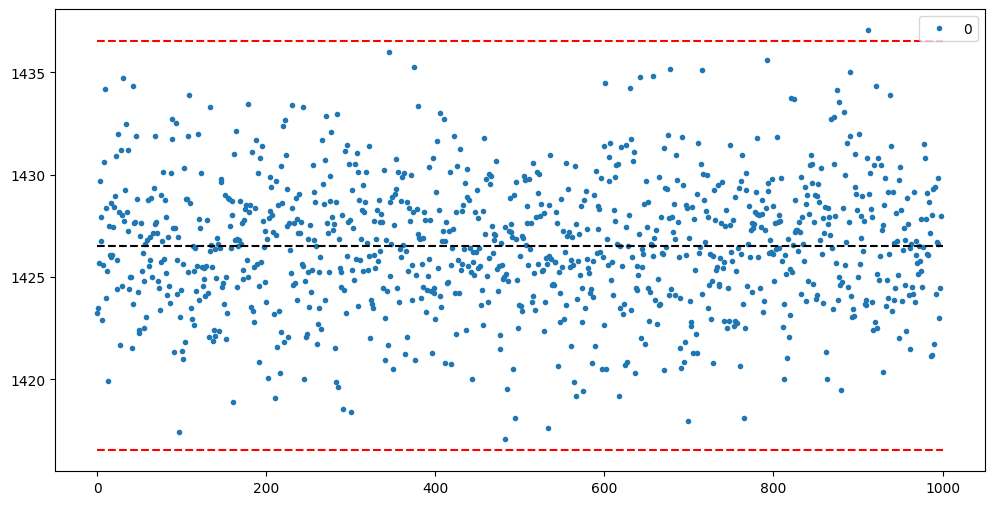

In [112]:
import matplotlib.pyplot as plt 

tamanho_simulacao = 1000

medias = [renda_5000.sample(n = n).mean() for i in range(1, tamanho_simulacao)]
medias = pd.DataFrame(medias)

ax = medias.plot(style='.')
ax.figure.set_size_inches(12, 6)
ax.hlines(y= media, xmin = 0, xmax = tamanho_simulacao, colors='black', linestyles='dashed')
ax.hlines(y=intervalo[0], xmin=0, xmax=tamanho_simulacao, colors='red', linestyles='dashed')
ax.hlines(y=intervalo[1], xmin=0, xmax=tamanho_simulacao, colors='red', linestyles='dashed')



np.float64(45038.95481598124)